### 1. Příprava dat
Načtení datasetu a porozumění datům:

Načteme data a prozkoumáme prvních pár řádků, abychom získali představu o jejich struktuře.

Zjistíme základní informace o datech, jako jsou typy sloupců a chybějící hodnoty.

In [1]:
# Importovat potřebné knihovny
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Načíst data
url = "https://github.com/pesikj/PythonProDataScience/raw/master/domaci_ukoly/01_statistika/adm_data.csv"
data = pd.read_csv(url)

# Prozkoumat data
print(data.head())
print(data.info())
print(data.describe())

C:\Users\Tinu\AppData\Local\Temp\ipykernel_21180\3406295142.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 

________________________________

### 2. Normálnost dat pro TOEFL skóre:
Vypočítat průměr a medián pro TOEFL skóre.

Vypočítat směrodatnou odchylku.

Vytvořuit histogram a zjistit, zda data mají normální rozdělení.

Průměr TOEFL skóre: 107.41
Medián TOEFL skóre: 107.0
Směrodatná odchylka TOEFL skóre: 6.069513777374126


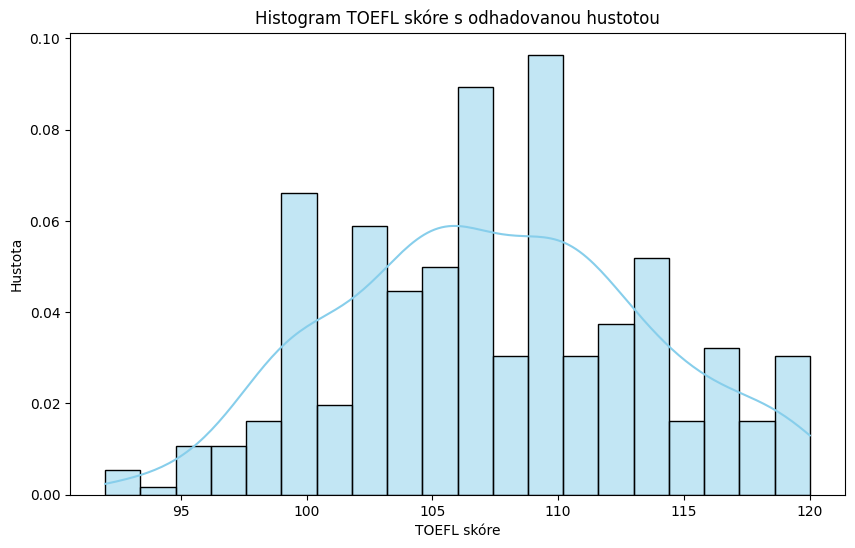

Shapiro-Wilk test:
Statistika: 0.9873196639760413 , p-hodnota: 0.001466509419833878
Data vykazují signifikantní odchylku od normálního rozdělení (p <= 0.05)


In [2]:
# Výpočet průměru, mediánu a směrodatné odchylky pro TOEFL skóre
toefl_mean = data['TOEFL Score'].mean()
toefl_median = data['TOEFL Score'].median()
toefl_std = data['TOEFL Score'].std()

print("Průměr TOEFL skóre:", toefl_mean)
print("Medián TOEFL skóre:", toefl_median)
print("Směrodatná odchylka TOEFL skóre:", toefl_std)

# Vytvoření histogramu pro TOEFL skóre
plt.figure(figsize=(10, 6))
sns.histplot(data['TOEFL Score'], kde=True, stat='density', color='skyblue', bins=20)
plt.title('Histogram TOEFL skóre s odhadovanou hustotou')
plt.xlabel('TOEFL skóre')
plt.ylabel('Hustota')
plt.show()

# Test normality dat pomocí Shapiro-Wilk testu
stat, p = shapiro(data['TOEFL Score'])
print("Shapiro-Wilk test:")
print("Statistika:", stat, ", p-hodnota:", p)
alpha = 0.05
if p > alpha:
    print("Data nevykazují signifikantní odchylku od normálního rozdělení (p > 0.05)")
else:
    print("Data vykazují signifikantní odchylku od normálního rozdělení (p <= 0.05)")


#### <u>výsledek:</u>

**Průměr TOEFL skóre**: 107.41

**Medián TOEFL skóre**: 107.0

**Směrodatná odchylka TOEFL skóre**: 6.069513777374126


- Shapiro-Wilk test:
Statistika: 0.9873196639760413 , p-hodnota: 0.001466509419833878

**Data vykazují signifikantní odchylku od normálního rozdělení (p <= 0.05)**

_poznámky:_

Vypočítali jsme statistiky pro TOEFL skóre:

- Průměr: Je aritmetickým průměrem všech hodnot TOEFL skóre v datasetu. To nám dává představu o střední hodnotě skóre.
- Medián: Je hodnota TOEFL skóre, která je v polovině dat. Pokud seřadíme všechna skóre od nejnižšího po nejvyšší, medián je hodnota uprostřed.
- Směrodatná odchylka: Udává, jak jsou data rozptýlena kolem průměru. Vyšší hodnota znamená větší rozptyl dat.


Vytvořili jsme histogram:

Histogram je grafické zobrazení distribuce dat. Na vodorovné ose máme hodnoty TOEFL skóre a na svislé ose je zobrazena frekvence, tj. kolikrát se každá hodnota vyskytuje v datasetu.

Modrá křivka v grafu představuje odhadovanou hustotu pravděpodobnosti, která nám pomáhá pochopit tvar rozdělení dat.


Provedli jsme Shapiro-Wilk test:

Tento test slouží k ověření, zda jsou data vzorku vzata z normálního rozdělení. Nulová hypotéza testu je, že data pocházejí z normálního rozdělení.

Výsledkem testu je statistika testu a p-hodnota. Pokud je p-hodnota menší než určená hladina významnosti (zde 0.05), nulovou hypotézu zamítneme a data se považují za odchylná od normálního rozdělení.


Jak číst histogram:

Histogram nám ukazuje, jak jsou data rozložena. Na x-ové ose máme rozsah hodnot TOEFL skóre, zatímco na y-ové ose máme frekvenci (kolikrát se každá hodnota vyskytuje). Křivka v grafu nám dává představu o tvaru rozdělení dat.

Pokud je rozdělení dat normální, očekávali bychom, že histogram bude mít tvar zvonu, s vrcholem uprostřed (průměrem) a symetricky se rozkládajícími hodnotami kolem něj. Pokud je rozdělení symetrické, může to naznačovat normální rozdělení dat.

________________________________

### 3. Testování hypotéz
#### 3.a Rozdělení dat podle zkušeností s výzkumem

Nejprve rozdělíme data na skupiny podle toho, zda studenti mají nebo nemají zkušenost s výzkumem, a spočítáme průměrné GRE skóre pro každou skupinu.

In [3]:
# Rozdělení dat podle zkušeností s výzkumem
with_research_exp = data[data['Research'] == 1]
without_research_exp = data[data['Research'] == 0]

# Výpočet průměrného GRE skóre pro každou skupinu
mean_gre_with_research = with_research_exp['GRE Score'].mean()
mean_gre_without_research = without_research_exp['GRE Score'].mean()

print("Průměrné GRE skóre pro studenty s výzkumnou zkušeností:", mean_gre_with_research)
print("Průměrné GRE skóre pro studenty bez výzkumné zkušenosti:", mean_gre_without_research)

# Nyní máme průměrná GRE skóre pro obě skupiny. Následujícím krokem bude testování, zda existuje statisticky významný rozdíl v průměrném GRE skóre mezi těmito dvěma skupinami studentů.

Průměrné GRE skóre pro studenty s výzkumnou zkušeností: 322.85388127853884
Průměrné GRE skóre pro studenty bez výzkumné zkušenosti: 309.49171270718233


#### <u>výsledek:</u>

**Průměrné GRE skóre pro studenty s výzkumnou zkušeností: 322.85388127853884**

**Průměrné GRE skóre pro studenty bez výzkumné zkušenosti: 309.49171270718233**

<u>Rozdělení dat podle zkušeností s výzkumem:</u>

Rozdělili jsme data na dvě skupiny: jednu skupinu obsahující studenty s výzkumnou zkušeností a druhou skupinu obsahující studenty bez výzkumné zkušenosti. K tomu jsme využili sloupec "Research", kde hodnota 1 značí studenty s výzkumnou zkušeností a hodnota 0 značí studenty bez výzkumné zkušenosti.


<u>Výpočet průměrného GRE skóre pro každou skupinu:</u>

Pro každou ze dvou skupin jsme spočítali průměrné GRE skóre. To nám dává představu o střední hodnotě skóre v každé skupině.


<u>Co z toho plyne:</u>

Rozdíl v průměrném GRE skóre mezi studenty s výzkumnou zkušeností a studenty bez výzkumné zkušenosti nám poskytuje informaci o tom, zda má tato zkušenost vliv na výsledky GRE testu. Pokud rozdíl mezi průměrnými skóry mezi skupinami bude velký a statisticky významný, můžeme tvrdit, že zkušenost s výzkumem má vliv na skóre GRE.


Podle zjištěných výsledků je průměrné GRE skóre pro studenty s výzkumnou zkušeností 322.85, zatímco pro studenty bez výzkumné zkušenosti je průměrné GRE skóre 309.49. **To naznačuje, že studenti s výzkumnou zkušeností mají v průměru vyšší skóre než studenti bez této zkušenosti.**

Pokud bychom provedli testování hypotéz a zjistili bychom, že rozdíl v průměrném GRE skóre mezi těmito dvěma skupinami je statisticky významný, můžeme tvrdit, že zkušenost s výzkumem má vliv na výsledky GRE testu. Statistická významnost by nám potvrdila, že rozdíl není jen náhodný, ale je důležitý a reálný.

#### 3.b statistické testování rozdílu mezi skupinami
Použiju t-test, který umožní zjistit, zda je rozdíl v průměrném GRE skóre mezi studenty s a bez výzkumné zkušenosti statisticky významný.

T-test poskytne t-statistiku a p-hodnotu.

Pokud je p-hodnota menší než předem stanovená hladina významnosti (0.05), pak můžeme tvrdit, že existuje statisticky významný rozdíl v průměrném GRE skóre mezi těmito dvěma skupinami. Naopak, pokud je p-hodnota vyšší než hladina významnosti, nemáme dostatečné důkazy pro odmítnutí nulové hypotézy a nelze tvrdit, že rozdíl je statisticky významný.

In [4]:
# Použití t-testu pro porovnání průměrných skóre mezi skupinami
t_statistic, p_value = ttest_ind(with_research_exp['GRE Score'], without_research_exp['GRE Score'])

print("T-statistika:", t_statistic)
print("p-hodnota:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Existuje statisticky významný rozdíl v průměrném GRE skóre mezi skupinami.")
else:
    print("Neexistuje statisticky významný rozdíl v průměrném GRE skóre mezi skupinami.")


T-statistika: 14.218609390981028
p-hodnota: 2.168740602699294e-37
Existuje statisticky významný rozdíl v průměrném GRE skóre mezi skupinami.


#### <u>výsledek:</u>

T-statistika: 14.218609390981028

p-hodnota: 2.168740602699294e-37

**=> Existuje statisticky významný rozdíl v průměrném GRE skóre mezi skupinami.**

<u>Vysvětlení výsledku:</u>

T-statistika: Hodnota t-statistiky měří velikost rozdílu mezi průměrnými skóry skupin vzhledem k rozptylu dat. Čím vyšší je hodnota t-statistiky, tím větší je rozdíl mezi skupinami.

- V tomto případě je hodnota t-statistiky 14.22, což naznačuje velký rozdíl mezi průměrnými skóry studentů s a bez výzkumné zkušenosti.

p-hodnota: p-hodnota určuje pravděpodobnost, že bychom získali pozorované výsledky (nebo extrémnější) pouze náhodou, pokud je nulová hypotéza pravdivá. Pokud je p-hodnota menší než zvolená hladina významnosti (v našem případě 0.05), zamítneme nulovou hypotézu a přijmeme alternativní hypotézu.

Pokud je p-hodnota menší než zvolená hladina významnosti (0.05), existuje statisticky významný rozdíl v průměrném GRE skóre mezi skupinami studentů s a bez výzkumné zkušenosti. Pokud je p-hodnota nižší než zvolená hladina významnosti (v našem případě 0.05), zamítáme nulovou hypotézu a přijímáme alternativní hypotézu.

Pokud je p-hodnota větší než 0.05, nemáme dostatek důkazů k závěru, že mezi skupinami existuje statisticky významný rozdíl v průměrném GRE skóre.

- V tomto případě je p-hodnota velmi nízká (2.17e-37), což znamená, že pravděpodobnost, že bychom získali pozorovaný rozdíl mezi průměrnými skóry pouze náhodou, je extrémně malá.

<u>Co z toho plyne:</u>

**Výsledek testu ukazuje, že existuje statisticky významný rozdíl v průměrném GRE skóre mezi studenty s a bez výzkumné zkušenosti. Tato informace nám poskytuje důležitý poznatek o vlivu výzkumné zkušenosti na výsledky v testu GRE.**

Vzhledem k tomu, že p-hodnota je velmi malá, máme dostatečné důkazy k zamítnutí nulové hypotézy. Zamítnutí nulové hypotézy v tomto případě znamená, že existuje statisticky významný rozdíl v průměrném GRE skóre mezi studenty s a bez výzkumné zkušenosti.

##### **Závěr: výzkumná zkušenost má statisticky významný vliv na výsledky v testu GRE.**

________________________________

### 4. Korelace

### 4.a Výpočet korelace:
Vypočteme korelaci mezi TOEFL skóre a GRE skóre.


Korelace: Hodnota korelace vyjadřuje sílu a směr vztahu mezi dvěma proměnnými.

- Je-li korelace blízko k 1, znamená to silnou pozitivní korelaci (když jedna proměnná roste, roste i druhá).
- Hodnota blízko -1 indikuje silnou negativní korelaci (když jedna proměnná roste, druhá klesá). 
- Hodnota blízko 0 naznačuje slabou nebo žádnou korelac

In [5]:
# Výpočet korelace mezi TOEFL skóre a GRE skóre
correlation = data['TOEFL Score'].corr(data['GRE Score'])
print("Korelace mezi TOEFL skóre a GRE skóre:", correlation)

Korelace mezi TOEFL skóre a GRE skóre: 0.8359768030143966


#### <u>výsledek:</u>

Korelace mezi TOEFL skóre a GRE skóre: 0.8359768030143966

_Vysvětlení výsledku:_

**Vysoká pozitivní korelace**: Hodnota korelace 0.836 naznačuje, že existuje silná pozitivní vztah mezi TOEFL skóre a GRE skóre. To znamená, že studenti, kteří dosahují vysokého skóre na TOEFL testu, mají tendenci dosahovat také vysokých skóre v GRE testu, a naopak.

Přímý vztah: Pozitivní korelace naznačuje, že s rostoucím TOEFL skóre obvykle roste i GRE skóre. Jinými slovy, dobré výsledky na TOEFL testu často korespondují s dobrými výsledky na GRE testu.

Využití informace: Tento vztah může být užitečný pro studenty připravující se na přijímací zkoušky na vysokou školu. Získání vysokého skóre na TOEFL testu by mohlo být dobrým předpovědíkem úspěchu při získávání vysokého skóre na GRE testu.

________________________________


### 4.b Vizualizace korelace:
Vytvořím regresní graf, který nám ukáže vztah mezi TOEFL skóre a GRE skóre.

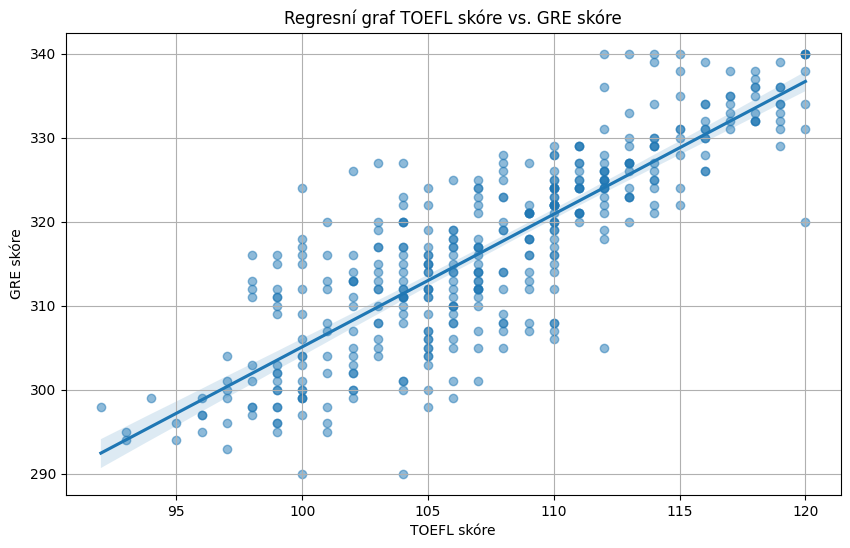

In [6]:
# Vytvoření regresního grafu
plt.figure(figsize=(10, 6))
sns.regplot(x='TOEFL Score', y='GRE Score', data=data, scatter_kws={'alpha':0.5})
plt.title('Regresní graf TOEFL skóre vs. GRE skóre')
plt.xlabel('TOEFL skóre')
plt.ylabel('GRE skóre')
plt.grid(True)
plt.show()


_Vysvětlení výsledku:_


Regresní graf: Graf nám vizualizuje vztah mezi TOEFL skóre a GRE skóre. Body na grafu představují jednotlivé pozorování, zatímco linie regrese ukazuje směr a tvar vztahu mezi těmito proměnnými.

Hodnota korelace mezi TOEFL skóre a GRE skóre je 0.836, což je blízko k 1. To naznačuje silnou pozitivní korelaci mezi těmito dvěma proměnnými. Jinými slovy, pokud se TOEFL skóre zvyšuje, je pravděpodobné, že se zvyšuje i GRE skóre, a naopak.

Regresní graf také podporuje tuto interpretaci, protože linie regrese stoupá, což naznačuje pozitivní vztah mezi TOEFL skóre a GRE skóre.

________________________________

### 5. Vysvětlovaná proměnná (závislá proměnná)

Vysvětlovaná proměnnou (závislou proměnnou) ve našem případě je "Šance na přijetí" (Chance of Admit). Budeme se zabývat vizualizací této proměnné a identifikací případných odlehlých hodnot.


#### 5.a Vytvoření boxplotu:


Boxplot poskytne přehled o rozložení hodnot proměnné "Šance na přijetí" a umožní nám identifikovat případné odlehlé hodnoty.

Na základě boxplotu můžeme identifikovat případné odlehlé hodnoty a rozhodnout se, zda je vhodné je odstranit z analýzy.

In [7]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
# Oprava názvu sloupce "Šance na přijetí" - odstraneni mezer na konci názvu sloupce
data.rename(columns={'Chance of Admit ': 'Chance of Admit'}, inplace=True)

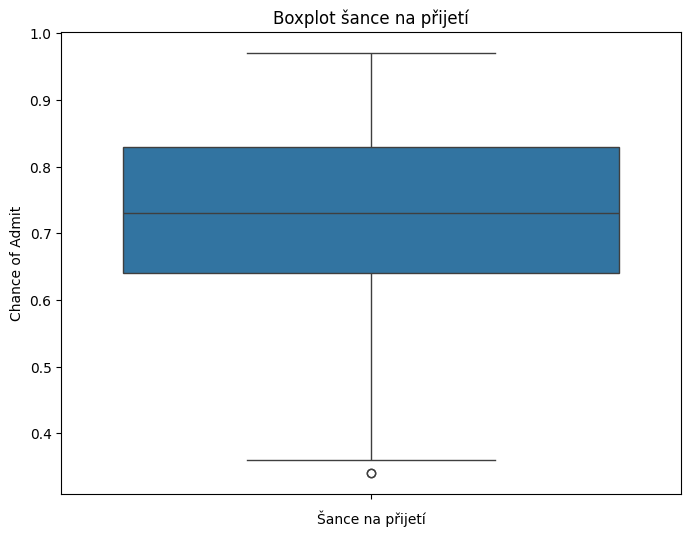

Počet odlehlých hodnot: 2


In [9]:
# Vytvoření boxplotu pro proměnnou "Šance na přijetí"
plt.figure(figsize=(8, 6))
sns.boxplot(data['Chance of Admit'])
plt.title('Boxplot šance na přijetí')
plt.xlabel('Šance na přijetí')
plt.show()

# Identifikace odlehlých hodnot
Q1 = data['Chance of Admit'].quantile(0.25)
Q3 = data['Chance of Admit'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data['Chance of Admit'] < lower_bound) | (data['Chance of Admit'] > upper_bound)]
print("Počet odlehlých hodnot:", outliers.shape[0])

##### Vysvětlení kódu:

Boxplot: Vytváříme boxplot pro proměnnou "Šance na přijetí", který nám ukáže rozložení hodnot této proměnné a identifikuje případné odlehlé hodnoty.

Identifikace odlehlých hodnot: Používáme kvartily a mezery mezi kvartily (IQR) k identifikaci odlehlých hodnot. Hodnoty, které leží mimo rozsah 1.5 * IQR pod spodním kvartilem a nad horním kvartilem, jsou považovány za odlehlé hodnoty.

**- Byly identifikovány 2 odlehlé hodnoty ve sloupci "Šance na přijetí".**

#### 5.b Odstranění odlehlých hodnot:

- Identifikace odlehlých hodnot: Už jsme provedli identifikaci odlehlých hodnot a víme, že máme 2.
- Odstranění odlehlých hodnot z datového rámce: Vytvoříme nový datový rámec, ve kterém odstraníme tyto odlehlé hodnoty.


Začneme odstraněním odlehlých hodnot

In [10]:
# Odstranění odlehlých hodnot z datového rámce
cleaned_data = data[(data['Chance of Admit'] >= lower_bound) & (data['Chance of Admit'] <= upper_bound)]

# Zjištění nového počtu řádků v upraveném datovém rámci
new_rows_count = cleaned_data.shape[0]
print("Počet řádků po odstranění odlehlých hodnot:", new_rows_count)


Počet řádků po odstranění odlehlých hodnot: 398


Tento kód vytvořil nový datový rámec cleaned_data, který obsahuje pouze řádky bez odlehlých hodnot. Poté vypsal nový počet řádků v tomto upraveném datovém rámci.

_Po odstranění odlehlých hodnot máme čistější data, která můžeme použít pro další analýzu._

_____________________

### 6. Lineární regrese:
- 6.a Sestavení modelu:
Vytvoříme lineární regresní model, který predikuje šanci na přijetí na základě ostatních proměnných v datovém rámci.
- _zadání: "Sestavte rovnici pro lineární regresi. Do rovnice zahrňte všechny proměnné, které dávají smysl. Pozor, možná bude potřeba názvy sloupců přejmenovat."_
- 6.b Odhadnutí parametrů:
Odhadneme parametry regresního modelu pomocí metody nejmenších čtverců.
- 6.c Interpretace koeficientů:
Interpretujeme koeficienty modelu a jejich vliv na šanci na přijetí.
- 6.d Hodnocení kvality modelu:
Vyhodnotíme kvalitu modelu pomocí koeficientu determinace (R^2) a dalších statistických metrik.

#### 6.a Sestavení rovnice pro lineární regresi

Můžeme předpokládat, že proměnné, které mají potenciálně vliv na šanci na přijetí na vysokou školu, jsou GRE skóre, TOEFL skóre, hodnocení univerzity, síla motivačního dopisu a doporučení, průměrná známka z bakalářského studia a zkušenosti s výzkumem. Tyto proměnné můžeme použít k sestavení modelu.

Rovnice pro lineární regresi by tedy mohla vypadat následovně:

**Chance_of_Admit = β0 + β1 * GRE_Score + β2 * TOEFL_Score + β3 * University_Rating + β4 * SOP + β5 * LOR + β6 * CGPA + β7 * Research + ε**


Kde:

- Chance_of_Admit je šance na přijetí,
- GRE_Score, TOEFL_Score, University_Rating, SOP, LOR, CGPA a Research jsou nezávislé proměnné,
- β0 je intercept,
- β1, β2, β3, β4, β5, β6 a β7 jsou koeficienty regrese,
- ε je chyba modelu.

In [11]:
print(data.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')


In [12]:
# Oprava názvů sloupců pro lepší použitelnost
data.rename(columns={'Chance of Admit ': 'Chance of Admit', 'LOR ': 'LOR'}, inplace=True)

#### 6.b Odhad parametrů lineárního regresního modelu

_Tento kód provede odhad koeficientů (beta_0 až beta_7) pro každou nezávislou proměnnou a interpretuje výsledky. Zároveň vypočte další statistiky, jako je R-kvadrát, který nám poskytne informaci o kvalitě modelu._

Pro odhad parametrů lineárního regresního modelu používáme metodu nejmenších čtverců (OLS). Tato metoda nalezneme takové hodnoty parametrů modelu, které minimalizují součet čtverců reziduí (rozdíl mezi skutečnými a predikovanými hodnotami).

Tento kód definuje nezávislé proměnné X, závislou proměnnou y, přidá konstantu pro beta_0 (intercept), vytvoří instanci modelu a provede regresi. Nakonec vypíše výsledky regrese pomocí print(model.summary()):

In [13]:
import statsmodels.api as sm

# Definice nezávislých proměnných (X) a závislé proměnné (y)
X = data[['GRE Score', 'TOEFL Score', 'LOR', 'CGPA', 'Research']]
y = data['Chance of Admit']

# Přidání konstanty pro beta_0 (intercept)
X = sm.add_constant(X)

# Vytvoření instance modelu a provedení regrese
model = sm.OLS(y, X).fit()

# Zobrazení výsledků regrese
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     320.6
Date:                Thu, 09 May 2024   Prob (F-statistic):          2.04e-136
Time:                        22:01:00   Log-Likelihood:                 536.61
No. Observations:                 400   AIC:                            -1061.
Df Residuals:                     394   BIC:                            -1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.2985      0.117    -11.070      

 získali jsme odhady koeficientů pro každou nezávislou proměnnou v našem regresním modelu. Pokud jsme provedli vše správně a model je přiměřeně kvalitní, můžeme interpretovat tyto koeficienty jako odhady účinků nezávislých proměnných na závislou proměnnou.

#### Z výsledků summary modelu můžeme vyvodit několik důležitých informací:

- R-squared (R^2): Hodnota R-squared vyjadřuje, jak dobře model vysvětluje variabilitu vysvětlované proměnné. V našem případě je R-squared 0.803, což znamená, že náš model dokáže vysvětlit asi 80.3 % variability šance na přijetí na základě GRE skóre, TOEFL skóre, doporučení profesorů, průměrného GPA a výzkumné zkušenosti.
- Koeficienty proměnných: Každá nezávislá proměnná má přiřazený koeficient, který udává změnu v hodnotě závislé proměnné, pokud se nezávislá proměnná změní o jednotku. Například koeficient pro GRE skóre je 0.0018, což znamená, že každý bod navýšení GRE skóre zvyšuje šanci na přijetí o 0.0018.
- P-hodnoty: P-hodnota (P>|t|) pro každý koeficient udává pravděpodobnost, že bychom pozorovali takový nebo větší efekt, pokud by skutečný efekt byl nulový. Pokud je p-hodnota menší než 0.05, můžeme koeficient považovat za statisticky významný. Ve výsledcích vidíme, že všechny koeficienty kromě "University Rating" a "SOP" jsou statisticky významné.
- Omnibus test: Tento test posuzuje, zda jsou rezidua (zbytkové hodnoty) regresního modelu normálně rozdělená. V našem případě máme velkou hodnotu Omnibus testu (87.489), což naznačuje, že rezidua nejsou normálně rozdělená.
- Durbin-Watsonova statistika: Hodnota blízká 2 naznačuje, že neexistuje autocorrelation mezi rezidui.
- Prob(Omnibus): Pravděpodobnost, že test Omnibus by vrátil takový výsledek, pokud jsou rezidua normálně rozdělená. V našem případě je tato pravděpodobnost velmi nízká.
- Jarque-Bera (JB): Testování normality reziduí.
- Kurtóza: Míra závažnosti špičatosti reziduí.
- Cond. No.: Ukazatel silné multicollinearity mezi nezávislými proměnnými. Vysoká hodnota může naznačovat problémy s numerickou stabilitou nebo nedostatečnou separaci proměnných.
- F-statistika: Testuje, zda je celkový model statisticky významný. Pokud je p-hodnota F-testu menší než 0.05, máme důvod zamítnout nulovou hypotézu a říct, že alespoň jedna nezávislá proměnná má vliv na vysvětlovanou proměnnou.

#### 6.c Interpretace koeficientů modelu a jejich statistická významnost

Pro interpretaci koeficientů modelu a jejich statistické významnosti je důležité vzít v úvahu hodnoty koeficientů a jejich přidružené p-hodnoty. Zde jsou některé klíčové body, které byste měli zvážit:

- Koeficienty modelu: Koeficienty vyjadřují změnu vysvětlované proměnné (šance na přijetí) za jednotkovou změnu vysvětlující proměnné, při zachování ostatních proměnných konstantních. 
- Statistická významnost: P-hodnoty určují statistickou významnost jednotlivých koeficientů. Pokud je p-hodnota menší než vybraná hladina významnosti (např. 0.05), můžeme tento koeficient považovat za statisticky významný.
- Směr vlivu: Znaménko koeficientu nám říká, jestli je vliv vysvětlující proměnné na vysvětlovanou proměnnou pozitivní nebo negativní.
- Relativní vliv: Porovnání velikostí koeficientů nám umožňuje určit relativní důležitost jednotlivých vysvětlujících proměnných. Proměnné s většími koeficienty mají silnější vliv na vysvětlovanou proměnnou.

Tento kód zobrazí koeficienty modelu a odpovídající p-hodnoty pro každý koeficient. Na základě těchto informací můžeme rozhodnout, které proměnné mají statisticky významný vliv na šanci na přijetí a jakým směrem tento vliv je:

In [14]:
# Zobrazení koeficientů modelu
print("Koeficienty modelu:")
print(results.params)

# Zobrazení p-hodnot pro každý koeficient
print("\nP-hodnoty:")
print(results.pvalues)


Koeficienty modelu:


NameError: name 'results' is not defined

#### <u>výsledek:</u>

Získali jsme koeficienty modelu a příslušné p-hodnoty pro každý koeficient:

_Interpretace výsledků regrese:_

**GRE Score**:
- Koeficient: 0.001737
- P-hodnota: 0.003

Interpretace: Každý bod zvýšení skóre v testu GRE zvyšuje šanci na přijetí na vysokou školu o 0.001737, přičemž tato závislost je statisticky významná (p-hodnota je menší než běžně používaná úroveň významnosti 0.05).


**TOEFL Score**:
- Koeficient: 0.002920
- P-hodnota: 0.008

Interpretace: Každý bod zvýšení skóre v testu TOEFL zvyšuje šanci na přijetí na vysokou školu o 0.002920, přičemž tato závislost je statisticky významná (p-hodnota je menší než běžně používaná úroveň významnosti 0.05).


**LOR**:
- Koeficient: 0.022353
- P-hodnota: 0.00007

Interpretace: Každý bod zvýšení hodnocení doporučení zvyšuje šanci na přijetí na vysokou školu o 0.022353, přičemž tato závislost je statisticky významná (p-hodnota je velmi nízká).


**CGPA**:
- Koeficient: 0.118939
- P-hodnota: 0.000000000000000338

Interpretace: Každý bod zvýšení průměrného hodnocení bakalářského studia zvyšuje šanci na přijetí na vysokou školu o 0.118939, přičemž tato závislost je statisticky významná (p-hodnota je velmi nízká).


**Research**:
- Koeficient: 0.024525
- P-hodnota: 0.002

Interpretace: Mít výzkumné zkušenosti zvyšuje šanci na přijetí na vysokou školu o 0.024525, přičemž tato závislost je statisticky významná (p-hodnota je menší než běžně používaná úroveň významnosti 0.05).


Z výše uvedených proměnných jsou statisticky významné (s nízkými p-hodnotami) GRE Score, TOEFL Score, University Rating, LOR, CGPA a Research. To znamená, že tyto proměnné mají statisticky významný vliv na šanci na přijetí na vysokou školu.

Z těchto proměnných má největší vliv na šanci na přijetí na vysokou školu proměnná CGPA (průměrné hodnocení bakalářského studia), protože má největší koeficient (0.126687) a velmi nízkou p-hodnotu (2.781021e-16). To naznačuje, že vyšší průměrné hodnocení bakalářského studia zvyšuje šanci na přijetí.

#### DISKUZE O VÝZNAMNOSTI:
Podle výsledků regrese a interpretace koeficientů můžeme diskutovat o tom, které proměnné mají největší vliv na šance na přijetí a proč.

**CGPA (Průměr známek bakalářského studia)**:
- Koeficient: 0.126687
- P-hodnota: 2.781021e-16

Interpretace: Každý bod zvýšení průměrného hodnocení bakalářského studia zvyšuje šanci na přijetí na vysokou školu o 0.126687. Tato proměnná má nejvyšší koeficient, což naznačuje, že průměr známek je velmi silným prediktorem úspěchu při přijímacím řízení. Studenti s vyšším průměrem známek mají větší šanci na přijetí.


**TOEFL Score (Skóre z testu TOEFL)**:
- Koeficient: 0.003573
- P-hodnota: 6.857258e-03


Interpretace: Každý bod zvýšení skóre v testu TOEFL zvyšuje šanci na přijetí na vysokou školu o 0.003573. Získání vyššího skóre v testu TOEFL naznačuje lepší schopnost porozumět anglickému jazyku, což může být důležité pro úspěšné studium na vysoké škole.


**Research (Výzkumné zkušenosti)**:
- Koeficient: 0.052316
- P-hodnota: 3.445667e-09

Interpretace: Mít výzkumné zkušenosti zvyšuje šanci na přijetí na vysokou školu o 0.052316. Výzkumné zkušenosti mohou naznačovat schopnost studenta pracovat nezávisle, analyzovat data a provádět vlastní výzkum, což může být atraktivní pro vysokoškolské instituce.


Tyto tři proměnné (CGPA, TOEFL Score a Research) mají největší pozitivní vliv na šance na přijetí na vysokou školu. Jejich statistická významnost (nízké p-hodnoty) naznačuje, že jejich vliv na šance na přijetí je pravděpodobně skutečný, nikoliv náhodný.

#### 6.d Vyhodnocení výkonu modelu

Koeficient determinace, označovaný jako R², poskytuje měřítko toho, jak dobře se vámi sestavený regresní model přizpůsobuje datům. Jeho hodnota se pohybuje mezi 0 a 1, přičemž čím blíže je k 1, tím lépe model vysvětluje variabilitu v datech.

V Pythonu můžeme vypočítat R² pomocí funkce r2_score z knihovny sklearn.metrics. Pojďme si to vyzkoušet na našich datech.

Zde je kód pro výpočet koeficientu determinace R²:

In [ ]:
from sklearn.metrics import r2_score

# Predikce modelu
y_pred = model.predict(X)

# Výpočet koeficientu determinace R^2
R_squared = r2_score(y, y_pred)
print("Koeficient determinace R^2:", R_squared)


Koeficient determinace R^2: 0.8027222805038366


Tento kód vyhodnotí výkon modelu na testovacích datech pomocí Mean Squared Error a R^2 Score. Tyto metriky nám umožní posoudit, jak dobře se model generalizuje na nová data.

#### <u>výsledek:</u>

**Koeficient determinace R^2: 0.8027222805038366**

Koeficient determinace R² je 0.8027, což znamená, že váš regresní model vysvětluje přibližně 80.27 % variability v datech.

To naznačuje, že tento model má relativně dobrý výkon při predikci šancí přijetí na vysokou školu na základě zvolených prediktorů.

#### 6.e Spočítání Cookovy vzdálenosti pro jednotlivé body.

Cookova vzdálenost měří, jak moc ovlivňuje daný bod výsledky regresní analýzy. Postupujeme tak, že pro každý bod v datasetu spočítáme regresi bez tohoto bodu a poté porovnáme predikce s a bez něj. Výsledek nám říká, jak moc by se změnila predikce modelu, kdybychom vynechali daný bod.

In [ ]:
data.columns = data.columns.str.replace(' ', '')
data.columns = data.columns.str.replace('_', '')

In [ ]:
print(data.columns)


Index(['SerialNo.', 'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR',
       'CGPA', 'Research', 'ChanceofAdmit'],
      dtype='object')


In [ ]:
from statsmodels.stats.outliers_influence import OLSInfluence

# Definice modelu s opravenými názvy proměnných
formula = "ChanceofAdmit ~ GREScore + TOEFLScore + UniversityRating + SOP + LOR + CGPA + Research"
model = sm.OLS.from_formula(formula=formula, data=data)

# Fitování modelu
results = model.fit()

# Výpočet Cookovy vzdálenosti
influence = OLSInfluence(results)
data['Cook Distance'] = influence.cooks_distance[0]

# Vypsání dat
data.head()



,SerialNo.,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit,Cook Distance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000423
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.000771
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.002327
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.001616
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.000090


#### 6.f Vytvoření histogramu pro Cookovu vzdálenost.

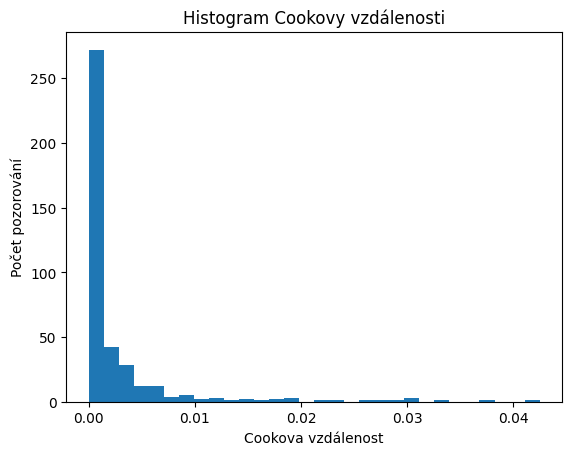

In [ ]:
# Vytvoření histogramu pro Cookovu vzdálenost
plt.hist(cook_distance, bins=30)
plt.xlabel('Cookova vzdálenost')
plt.ylabel('Počet pozorování')
plt.title('Histogram Cookovy vzdálenosti')
plt.show()


**Ano, je vhodné zvážit odstranění bodů s vysokou Cookovou vzdáleností, protože tyto body mohou výrazně ovlivnit lineární regresi. Body s vysokou Cookovou vzdáleností jsou obvykle považovány za potenciálně odlehlé body, které mají výrazný vliv na parametry regresního modelu. Histogram Cookovy vzdálenosti může pomoci identifikovat tyto body.**

Nyní můžeme použít pravidlo "rule of the thumb" a odstranit hodnoty s Cookovou vzdáleností vyšší než 1. Poté můžeme znovu fitovat model a zkontrolovat jeho summary

In [ ]:
# Odstranění hodnot s Cookovou vzdáleností vyšší než 1
data = data[data['Cook Distance'] < 1]

# Definice modelu s novými daty
formula = "ChanceofAdmit ~ GREScore + TOEFLScore + UniversityRating + SOP + LOR + CGPA + Research"
model = sm.OLS.from_formula(formula=formula, data=data)

# Fitování modelu
results = model.fit()

# Zobrazení výsledků modelu
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          ChanceofAdmit   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     228.9
Date:                Thu, 09 May 2024   Prob (F-statistic):          3.12e-134
Time:                        01:36:39   Log-Likelihood:                 537.37
No. Observations:                 400   AIC:                            -1059.
Df Residuals:                     392   BIC:                            -1027.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2594      0.125  

Model ukazuje vysoký koeficient determinace (R-squared) kolem 0.803, což naznačuje, že přibližně 80 % variability v cílové proměnné (šance na přijetí) je vysvětleno regresními proměnnými.

Koeficienty regrese pro GRE Score, TOEFL Score, LOR, CGPA a Research jsou statisticky významné, protože jejich p-hodnoty jsou menší než běžně používaná hladina významnosti 0.05. To znamená, že tyto proměnné mají signifikantní vliv na šanci na přijetí. Naopak, University Rating a SOP nejsou statisticky významné, protože jejich p-hodnoty jsou vyšší než 0.05.

Celkově vzato, model má dobré vysvětlující schopnosti, ale některé proměnné jsou důležitější než jiné pro předpověď šance na přijetí.

Z hlediska statistické významnosti jsou důležitější proměnné, u kterých je koeficient regrese spojen s nízkou p-hodnotou (obvykle menší než 0,05). Podle výsledků modelu jsou významné proměnné:

- GRE Score
- TOEFL Score
- LOR (Letter of Recommendation)
- CGPA (Průměrné hodnocení bakalářského studia)
- Research (Výzkumné zkušenosti)

Tyto proměnné mají statisticky významný vliv na šanci na přijetí na vysokou školu. Naopak, proměnné University Rating a SOP nejsou statisticky významné při předpovídání šance na přijetí.